In [ ]:
from google.colab import files
uploaded = files.upload()


Saving merged_gw_2324.csv to merged_gw_2324.csv


In [ ]:
#import results
from google.colab import files
import pandas as pd
upload = files.upload()
res = pd.read_csv("Results.csv")
res.head()

Saving Results.csv to Results.csv


,index,Simple Avg.,Weighted Avg.,Simulation (Non Parametric),Monte Carlo Simulation,"ARIMA (0,1,1)",Robust Simple Avg.,Robust Exponantial Smoothing,Robust Weighted Avg.,Simple Avg. (Budget = 70),...,Weighted Avg. Rolling (Budget = 70),Weighted Avg. Rolling (Budget = 60),"ARIMA (0,0,1) Rolling","ARIMA (0,0,1) Rolling (Budget = 80)","ARIMA (0,0,1) Rolling (Budget = 70)","ARIMA (0,0,1) Rolling (Budget = 60)","ARIMA (1,0,0) Rolling","ARIMA (1,0,0) Rolling (Budget = 75)","ARIMA (1,0,0) Rolling (Budget = 70)","ARIMA (1,0,0) Rolling (Budget = 60)"
0,1,76,68,68,70,60,63,31,71,72,...,69,53,71,59,48,48,70,75,76,54
1,2,31,38,34,31,35,32,23,32,28,...,39,38,46,46,37,37,33,46,38,31
2,3,10,7,10,10,6,32,17,28,7,...,3,11,7,8,7,7,8,9,8,7
3,4,50,56,52,52,39,26,33,33,63,...,52,46,57,71,57,57,52,67,54,50
4,5,40,64,42,40,27,27,21,41,44,...,64,40,61,42,40,40,39,65,60,36


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as mcolors

In [ ]:
import pandas as pd

# Replace 'filename.csv' with the actual name of your file
df = pd.read_csv('merged_gw_2324.csv')

df['value'] = df['value'] /10



In [ ]:
columns_to_exclude_ML = ['xP','bonus','bps','element','creativity','fixture','influence',
                         'kickoff_time','opponent_team','round','team_a_score', 'team_h_score',
                         'threat','transfers_balance', 'transfers_in','transfers_out',
                          'was_home','yellow_cards','red_cards','penalties_missed','goals_conceded','GW',
                          'goals_scored', 'assists', 'clean_sheets', 'minutes', 'saves', 'yellow_cards',
                    'red_cards', 'penalties_missed', 'penalties_saved', 'own_goals', 'bonus']
# Drop the specified columns
df_filtered = df.drop(columns=columns_to_exclude_ML)

# Print the resulting DataFrame
df_filtered.head()

,name,position,team,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,ict_index,selected,starts,total_points,value
0,Femi Seriki,DEF,Sheffield Utd,0.00,0.00,0.00,0.00,0.0,0,0,0,4.0
1,Jack Hinshelwood,MID,Brighton,0.00,0.00,0.00,0.00,0.0,822,0,0,4.5
2,Jadon Sancho,MID,Man Utd,0.05,0.05,0.00,1.08,2.3,83993,0,1,7.0
3,Rhys Norrington-Davies,DEF,Sheffield Utd,0.00,0.00,0.00,0.00,0.0,6456,0,0,4.0
4,Vitaly Janelt,MID,Brentford,0.01,0.03,0.02,1.26,4.3,6508,1,2,5.5


#Showing correlation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define player positions
positions = ['GK', 'DEF', 'MID', 'FWD']

# Set up the plot area
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

# Loop through each position group
for i, pos in enumerate(positions):
    # Filter for position
    df_pos = df[df['position'] == pos] # all dataset
    # df_pos = df_filtered[df_filtered['position'] == pos]filtered dataset

    # Compute correlation with total_points
    corr = df_pos.corr(numeric_only=True)['total_points'].sort_values(ascending=True)

    # Plot
    sns.barplot(x=corr.values, y=corr.index, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Correlation with Total Points: {pos}', fontsize=16)
    axes[i].set_xlabel('Correlation')
    axes[i].set_ylabel('Feature')
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("img.pdf", format="pdf")
plt.show()

#Traditional Approach only with expected total_points

In [ ]:
columns_to_keep = ['name','position','team','value','total_points']
columns_to_keep_test = ['name','position','team','value','total_points','GW']
simple_df = df[columns_to_keep]
simple_df.head()

,name,position,team,value,total_points
0,Femi Seriki,DEF,Sheffield Utd,4.0,0
1,Jack Hinshelwood,MID,Brighton,4.5,0
2,Jadon Sancho,MID,Man Utd,7.0,1
3,Rhys Norrington-Davies,DEF,Sheffield Utd,4.0,0
4,Vitaly Janelt,MID,Brentford,5.5,2


In [ ]:
# Spliting data
gameweek = 27 #gameweek 27
for index, row in df.iterrows():
  if row['GW'] == gameweek:
    idx = index
    break
# train,test = simple_df[:idx],df[columns_to_keep_test][idx:] #traditional method
train,test = df_filtered[:idx],df[idx:] #traditional method


In [ ]:
# Suppress specific warnings from statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore", category=Warning, module="statsmodels")


In [ ]:
import numpy as np
from scipy.stats import poisson

def average(points, method):
  #simple average
  if method == 'simple':
    return points.mean()
  elif method == 'weighted':
    # Generate weights: most recent row gets the highest weight
    weights = np.arange(1, len(points) + 1)  # 1 to N (older to newer)
    weights = weights / weights.sum()  # normalize weights to sum to 1
    return (points.multiply(weights, axis=0)).sum()
  elif method == 'simulation-non parametric':
    num_simulations=1000
    np.random.seed(54) #99=569
    return np.random.choice(points, size=num_simulations, replace=True).mean()
  elif method == 'monte carlo':
    num_simulations=1000 #previous 10000

    mean_score = np.mean(points)
    std_score = np.std(points, ddof=1)  # unbiased estimator
    if math.isnan(mean_score) or math.isnan(std_score):
      return 0
    np.random.seed(123) #123=545
    return np.random.normal(mean_score, std_score, num_simulations).mean()
  elif method == 'arima':
    if len(points) < 2 or points.mean()==0:
      return points.mean()  # Fall back to mean (or last value)
    try:
        model = ARIMA(points, order=(1,0,0)) #best = 001
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=38 - gameweek)
        return predictions.mean()  # or whatever you want to do with the forecast
    except Exception as e:
          print("ARIMA failed:", e)
          return points.mean()

  elif method == 'linear regression':
    if len(points) < 2 or points.mean()==0:
        return points.mean()  # Fall back to mean (or last value)
    try:
      # Create weeks array matching the length of points
      weeks = np.arange(1, len(points) + 1).reshape(-1, 1)
      scores = np.array(points)
      # Fit the model
      reg = LinearRegression()
      reg.fit(weeks, scores)

      # Predict from next week up to GW38
      future_weeks = np.arange(len(points) + 1, 39).reshape(-1, 1)
      predictions = reg.predict(future_weeks)
      return predictions.mean()
    except Exception as e:
      print("linear regression failed:", e)
      return points.mean()
  elif method == 'cvar':
    return points.to_numpy()
  elif method == 'exponential smoothing':
    if len(points) < 2:
      return points.mean()  # Fall back to mean (or last value)
    model = ExponentialSmoothing(points, trend='add')
    fit = model.fit()
    predictions = fit.forecast(38-gameweek)
    return predictions.mean()
  else:
    raise ValueError(f"Unknown method: {method}")

#Handling time series, using only expected points

In [ ]:
#handle time series data
import math
names = train['name'].unique()
scores = []
count = 0
method__ = 'exponential smoothing'
for name in names:
  count+=1
  points = train[train['name'] == name]['total_points']
  last_value = train[train['name'] == name]['value'].iloc[-1]
  average_ = average(points,method=method__) #prediction method
  sd = points.std()
  if math.isnan(sd):
    sd = 500
  position = train[train['name'] == name]['position'].iloc[-1]
  team = train[train['name'] == name]['team'].iloc[-1]
  scores.append({
        'name': name,
        'team': team,
        'position': position,
        'expected points': average_,
        'uncertainty': sd,
        'value': last_value
    })
  scores_df = pd.DataFrame(scores)

#Handling time series for all features that are not included in the expected total_points


In [ ]:
#handling time series for hybrid
import math
def hybrid_average(points, method):
  if method == 'simple average':
    return points.mean()
  elif method == 'linear regression':
      forecasts = {}
      numeric_cols = points.select_dtypes(include='number').columns

      for col in numeric_cols:
          col_data = points[col]
          if len(col_data) < 2 or col_data.mean() == 0:
              forecasts[col] = col_data.mean()  # fallback to mean
          else:
              try:
                  # Create weeks array matching the length of points
                  weeks = np.arange(1, len(col_data) + 1).reshape(-1, 1)
                  scores = col_data.values.reshape(-1, 1)
                  reg = LinearRegression()
                  reg.fit(weeks, scores)

                  # Predict from next week up to GW38
                  future_weeks = np.arange(len(col_data) + 1, 39).reshape(-1, 1)
                  predictions = reg.predict(future_weeks)
                  forecasts[col] = predictions.mean()
              except Exception as e:
                  print(f"Linear regression failed for {col}: {e}")
                  forecasts[col] = col_data.mean()  # fallback if regression fails

      return pd.Series(forecasts)
  if method == 'simple ICT':
        # Return a Series with 'ict_index' and mean for other numeric columns
        forecasts = {}
        forecasts['ict_index'] = points['ict_index'].mean()
        for col in points.select_dtypes(include='number').columns:
            if col != 'ict_index':
                forecasts[col] = points[col].mean()
        return pd.Series(forecasts)
  elif method == 'exponential smoothing':
    forecasts = {}
    numeric_cols = points.select_dtypes(include='number').columns

    for col in numeric_cols:
        col_data = points[col].dropna()
        if len(col_data) < 2:
            forecasts[col] = col_data.mean()
            continue
        try:
            model = ExponentialSmoothing(col_data, trend='add', initialization_method="estimated")
            fit = model.fit()
            steps = max(1, 38 - gameweek)  # safeguard against negative/zero
            predictions = fit.forecast(steps)
            forecasts[col] = predictions.mean()
        except Exception as e:
            print(f"Exponential smoothing failed for {col}: {e}")
            forecasts[col] = col_data.mean()

    return pd.Series(forecasts)
  elif method == 'simulation-non parametric':
    num_simulations = 1000
    forecasts = {}
    numeric_cols = points.select_dtypes(include='number').columns

    for col in numeric_cols:
        col_data = points[col].dropna()
        if len(col_data) == 0:
            forecasts[col] = 0
            continue
        try:
            np.random.seed(54)  # reproducibility
            simulated_values = np.random.choice(col_data, size=num_simulations, replace=True)
            forecasts[col] = simulated_values.mean()
        except Exception as e:
            print(f"Non-parametric simulation failed for {col}: {e}")
            forecasts[col] = col_data.mean()

    return pd.Series(forecasts)

  elif method == 'monte carlo':
      num_simulations = 1000  # previous 10000
      forecasts = {}
      numeric_cols = points.select_dtypes(include='number').columns

      for col in numeric_cols:
          col_data = points[col].dropna()
          mean_score = np.mean(col_data)
          std_score = np.std(col_data, ddof=1)  # unbiased estimator

          if math.isnan(mean_score) or math.isnan(std_score) or len(col_data) < 2:
              forecasts[col] = mean_score if not math.isnan(mean_score) else 0
          else:
              try:
                  np.random.seed(123)  # reproducibility
                  simulated = np.random.normal(mean_score, std_score, num_simulations)
                  forecasts[col] = simulated.mean()
              except Exception as e:
                  print(f"Monte Carlo failed for {col}: {e}")
                  forecasts[col] = mean_score

      return pd.Series(forecasts)
  if method == 'arima':
        # Only forecast 'total_points' with ARIMA
        forecasts = {}
        if len(points['total_points']) < 2 or points['total_points'].mean() == 0:
            # Fall back to mean for all numeric columns
            return points.mean()
        try:
            model = ARIMA(points['total_points'], order=(0,0,1))  # best = 011
            model_fit = model.fit()
            predictions = model_fit.forecast(steps=38 - gameweek)
            # Return as Series with 'total_points' and all other numeric columns
            forecasts['total_points'] = predictions.mean()
            for col in points.select_dtypes(include='number').columns:
                if col != 'total_points':
                    forecasts[col] = points[col].mean()  # fallback to mean for other columns
            return pd.Series(forecasts)
        except Exception as e:
            print("ARIMA failed:", e)
            # Return mean for all numeric columns if ARIMA fails
            return points.mean()
  elif method == 'weighted':
    # Create weights that increase over time (more recent = higher weight)
    weights = np.arange(1, len(points) + 1)

    # Apply weighted average for each column
    weighted_avg = (points.multiply(weights, axis=0)).sum() / weights.sum()

    return weighted_avg
names = train['name'].unique()
scores = []
for name in names:
  points = train[train['name'] == name]
  last_value = train[train['name'] == name]['value'].iloc[-1]
  average_ = hybrid_average(points.select_dtypes(include='number'),method='simple ICT') #prediction method
  sd_ICT   = points['ict_index'].std()
  if math.isnan(sd_ICT):
    sd_ICT = 500
  position = train[train['name'] == name]['position'].iloc[-1]
  team = train[train['name'] == name]['team'].iloc[-1]
  scores.append({
        'name': name,
        'team': team,
        'position': position,
        "ICT_uncertainty":sd_ICT,
        'value': last_value
    })
  scores_temp = {}
  for item in average_.keys():
    if item != 'value':
      scores_temp[item] = average_[item]
  scores[-1].update(scores_temp)

  scores_df_ = pd.DataFrame(scores)


In [ ]:
scores_df_.tail()

,name,team,position,ICT_uncertainty,value,ict_index,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,selected,starts,total_points
827,Dovydas Sasnauskas,Sheffield Utd,DEF,500.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
828,Toby Collyer,Man Utd,MID,500.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
829,Max Kinsey,Bournemouth,DEF,500.0,4.0,0.0,0.0,0.0,0.0,0.0,642.0,0.0,0.0
830,Kaden Rodney,Crystal Palace,MID,500.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
831,George Earthy,West Ham,MID,500.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#create column for hidden total points- Using linear regression to find the relationship between unused features with total_points

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge  # instead of LinearRegression
from sklearn.preprocessing import StandardScaler

# We'll create a new column for hybrid points
scores_df_['hybrid_points'] = 0.0

# Define the target and feature columns (only numeric and useful ones)
feature_cols = [
    'expected_assists', 'expected_goal_involvements', 'expected_goals',
    'expected_goals_conceded', 'ict_index', 'selected', 'starts',
     'total_points'  # include total_points for now, we'll drop it when modeling
]

# Process for each position
for position in scores_df_['position'].unique():
    df_pos = scores_df_[scores_df_['position'] == position].copy()

    # Drop rows with NaNs
    df_pos = df_pos.dropna(subset=feature_cols)

    # Define X and y
    X = df_pos[feature_cols].drop(columns=['total_points'])
    y = df_pos['total_points']

    # Normalize features to prevent large coefficients
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit Ridge regression (L2 regularization)
    # model = LinearRegression(fit_intercept=False)
    model = Ridge(alpha=1.0, fit_intercept=False)  # alpha controls strength of regularization (higher = more regularization)
    model.fit(X_scaled, y)

    # Get predictions and scale them
    y_pred = model.predict(X)
    # Normalize predictions to [0, 1] range for fair combination
    y_pred_normalized = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())

    # # Get total_points also scaled to [0, 1]
    total_points_scaled = (y - y.min()) / (y.max() - y.min())

    # Combine with 2:1 ratio (total_points has double weight)
    hybrid = (2 * total_points_scaled + 1 * y_pred_normalized) / 3
    # hybrid = (1 * y + 2 * y_pred) / 3 # with no intercept
    # Map back to the scores_df by index
    scores_df_.loc[df_pos.index, 'hybrid_points'] = hybrid * y.max()  # scale back to similar magnitude
scores_df_.head()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


,name,team,position,ICT_uncertainty,value,ict_index,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,selected,starts,total_points,hybrid_points
0,Femi Seriki,Sheffield Utd,DEF,0.000000,3.9,0.000000,0.000000,0.000000,0.000000,0.000000,6730.807692,0.000000,0.000000,0.076999
1,Jack Hinshelwood,Brighton,MID,3.071116,4.5,2.115385,0.013846,0.094615,0.080769,0.550000,5185.115385,0.307692,1.615385,3.241722
2,Jadon Sancho,Man Utd,MID,0.475038,6.7,0.138462,0.002692,0.002692,0.000000,0.071538,47807.730769,0.000000,0.115385,2.226104
3,Rhys Norrington-Davies,Sheffield Utd,DEF,0.372352,3.9,0.076923,0.000000,0.000000,0.000000,0.099231,12734.500000,0.076923,0.076923,0.128822
4,Vitaly Janelt,Brentford,MID,2.340099,5.3,3.461538,0.089231,0.135769,0.046538,1.262308,7844.500000,0.961538,2.346154,3.727950


#Optimizing

In [ ]:
!apt-get install -y glpk-utils
# !apt-get install -y coinor-cbc

In [ ]:
import pyomo.environ as pyo
import pandas as pd
from collections import defaultdict



# Mapping position to indices (optional, for display only)
position_map = {"GK": 0, "DEF": 1, "MID": 2, "FWD": 3}

# Group players by team
teams = scores_df["team"].unique()
team_players = defaultdict(list)

for idx, row in scores_df.iterrows():
    team_players[row["team"]].append(idx)  # Use DataFrame index for player IDs

# Model setup
model = pyo.ConcreteModel()
n_players = len(names)




budget = 83.5 #83.5
num_players = 11



# Decision variable: Binary (1 if player j is selected, 0 otherwise)
model.x = pyo.Var(range(n_players), domain=pyo.Binary) #players
model.y = pyo.Var(range(n_players), domain=pyo.Binary) #1 if capitan is player j



# Objective function: Maximize total score
def Obj(model):
    # return sum(scores_df.loc[j, "expected points"] * model.x[j]
    # for j in range(n_players)) + sum(scores_df.loc[j, "expected points"] * model.y[j] for j in range(n_players))  #regular objective function only expected points

    # return sum(scores_df_.loc[j, "hybrid_points"] * model.x[j]
    # for j in range(n_players)) + sum(scores_df_.loc[j, "hybrid_points"] * model.y[j] for j in range(n_players))   #using hybrid points


    # return sum(scores_df_.loc[j, "ict_index"] * model.x[j]
    # for j in range(n_players)) + sum(scores_df_.loc[j, "ict_index"] * model.y[j] for j in range(n_players))   #maximum expected ICT points


    return sum(scores_df_.loc[j, "expected_goal_involvements"] * model.x[j]
    for j in range(n_players)) + sum(scores_df_.loc[j, "expected_goal_involvements"] * model.y[j] for j in range(n_players)) - (sum
     (scores_df_.loc[j, "expected_goals_conceded"] * model.x[j]
    for j in range(n_players)) + sum(scores_df_.loc[j, "expected_goals_conceded"] * model.y[j] for j in range(n_players)) )

    # return model.eta - (1/((1-alpha)*T)) * sum(model.z[t] for t in range(T))

model.obj = pyo.Objective(rule=Obj, sense=pyo.maximize)

#CVaR constraint
# def z_constraints(model, t):
#     return model.z[t] >= model.eta - sum(
#         scores_df_.loc[j, "expected points"][t] * (model.x[j] + model.y[j])
#         for j in range(n_players)
#     )

# model.z_constr = pyo.Constraint(range(T), rule=z_constraints)



# robust optimization
def RobustObj(model):
    return sum(
        (scores_df_.loc[j, "ict_index"] - scores_df_.loc[j, "ICT_uncertainty"])
        * (model.x[j] + model.y[j])
        for j in range(n_players)
    )
    # return sum(
    #     (scores_df.loc[j, "expected points"] - scores_df.loc[j, "uncertainty"])
    #     * (model.x[j] + model.y[j])
    #     for j in range(n_players)
    # )
# model.obj = pyo.Objective(rule=RobustObj, sense=pyo.maximize)  # ← this must be present






# Constraint 1: Exactly 11 players must be selected
def Co1(model):
    return sum(model.x[j] for j in range(n_players)) == num_players
model.Co1 = pyo.Constraint(rule=Co1)



# Constraint 2: Budget ≤ 83.4
def Co2(model):
    return sum(scores_df.loc[j, "value"] * model.x[j] for j in range(n_players)) <= budget
model.Co2 = pyo.Constraint(rule=Co2)
#constraint 3 #only select one capitan
def Co3(model):
    return sum(model.y[j] for j in range(n_players)) == 1
model.Co3 = pyo.Constraint(rule=Co3)
#constraint 4:  #Capitan should be playing
def Co4(model, j):
    return model.y[j] <= model.x[j]
model.Co4 = pyo.Constraint(range(n_players), rule=Co4)


# Constraint 5: Position-specific limits
position_limits = {"GK": (1, 1), "DEF": (3, 5), "MID": (3, 5), "FWD": (1, 3)} #need to fill 2-5-5-3  = 15 players
for position, (min_limit, max_limit) in position_limits.items():
    # Get indices of players in this position
    position_players = scores_df[scores_df["position"] == position].index.tolist()
    model.add_component(
        f"Min_{position}",
        pyo.Constraint(expr=sum(model.x[j] for j in position_players) >= min_limit)
    )
    model.add_component(
        f"Max_{position}",
        pyo.Constraint(expr=sum(model.x[j] for j in position_players) <= max_limit)
    )

# Constraint 6: Maximum 3 players per team
for team in teams:
    model.add_component(
        f"Max_Team_{team}",
        pyo.Constraint(expr=sum(model.x[j] for j in team_players[team]) <= 3)
    )
# Solve the model
solver = pyo.SolverFactory("glpk", executable="/usr/bin/glpsol")  # Ensure GLPK is installed

solver.solve(model)

# Display selected players
selected_players = []
capitan          = []
for j in range(n_players):
    if pyo.value(model.x[j]) > 0.5:  # Player is selected
        selected_players.append(scores_df.loc[j, ["name", "team", "position",  "value"]]) #regular expected points-synced with the first objective function
        # selected_players.append(scores_df.loc[j, ["name", "team", "position", "ict_index", "value"]]) #regular expected points-synced with the first objective function

for j in range(n_players):
    if pyo.value(model.y[j]) > 0.5:  # Player is selected
        capitan.append(scores_df.loc[j, ["name", "team", "position",  "value"]]) #regular expected points-synced with the first objective function
        # capitan.append(scores_df.loc[j, ["name", "team", "position", "ict_index", "value"]]) #regular expected points-synced with the first objective function

# Convert to DataFrame for clean display
selected_df = pd.DataFrame(selected_players)
print(selected_df,'\n','capitan= ',pd.DataFrame(capitan))

                 name           team position  value
0         Femi Seriki  Sheffield Utd      DEF    3.9
10      Denis Franchi        Burnley       GK    3.9
25        Alex Murphy      Newcastle      DEF    3.9
28   Emile Smith Rowe        Arsenal      MID    5.3
212        Oscar Bobb       Man City      MID    4.4
263   Aymeric Laporte       Man City      DEF    4.9
412       Bukayo Saka        Arsenal      MID    9.1
445    Erling Haaland       Man City      FWD   14.4
794     Romain Faivre    Bournemouth      MID    5.0
805         Enes Ünal    Bournemouth      FWD    5.0
806     Morgan Rogers    Aston Villa      MID    5.0 
 capitan=                 name      team position  value
445  Erling Haaland  Man City      FWD   14.4


#Optimizing Bench

In [ ]:
# --- Bench Optimization Model ---

# Remaining budget
bench_budget = 100 - budget

# Count how many players per position are already in the starting XI
num_starting = selected_df['position'].value_counts().to_dict()

# How many per position we need on the bench
bench_requirements = {
    "GK": 1,
    "DEF": 5 - num_starting.get("DEF", 0),
    "MID": 5 - num_starting.get("MID", 0),
    "FWD": 3 - num_starting.get("FWD", 0)
}

# New Pyomo model for bench
bench_model = pyo.ConcreteModel()
bench_model.xb = pyo.Var(range(n_players), domain=pyo.Binary)  # 1 if player selected for bench

# Objective: maximize expected points
def BenchObj(model):
    return sum(scores_df.loc[j, "expected points"] * model.xb[j] for j in range(n_players))
bench_model.obj = pyo.Objective(rule=BenchObj, sense=pyo.maximize)

# Constraint 1: Position-specific bench requirements
for position, req in bench_requirements.items():
    position_players = scores_df[scores_df["position"] == position].index.tolist()
    bench_model.add_component(
        f"Bench_{position}",
        pyo.Constraint(expr=sum(bench_model.xb[j] for j in position_players) == req)
    )

# Constraint 2: Budget limit for bench
bench_model.budget_constraint = pyo.Constraint(
    expr=sum(scores_df.loc[j, "value"] * bench_model.xb[j] for j in range(n_players)) <= bench_budget
)

# Constraint 3: Maximum 3 players per team overall (starting + bench)
starting_counts = selected_df['team'].value_counts().to_dict()
for team in teams:
    team_indices = scores_df[scores_df["team"] == team].index.tolist()
    already_selected = starting_counts.get(team, 0)
    bench_model.add_component(
        f"TeamLimit_{team}",
        pyo.Constraint(expr=sum(bench_model.xb[j] for j in team_indices) + already_selected <= 3)
    )

# Constraint 4: No overlap between bench and starting XI
already_selected_indices = selected_df.index.tolist()
for idx in already_selected_indices:
    bench_model.add_component(
        f"NoOverlap_{idx}",
        pyo.Constraint(expr=bench_model.xb[idx] == 0)
    )

# Solve the bench model
solver.solve(bench_model)

# Extract bench players
bench_players = []
for j in range(n_players):
    if pyo.value(bench_model.xb[j]) > 0.5:
        bench_players.append(scores_df.loc[j, ["name", "team", "position", "value"]])

bench_df = pd.DataFrame(bench_players)
# Map expected points to bench_df based on 'name'
bench_df['expected_points'] = bench_df['name'].map(
    scores_df.set_index('name')['expected points']
)

# Sort by expected points descending, keep original indices
bench_df_sorted = bench_df.sort_values(by='expected_points', ascending=False)

print("Bench Squad sorted by expected points:\n", bench_df_sorted)



Bench Squad sorted by expected points:
                        name         team position  value  expected_points
555         Antoine Semenyo  Bournemouth      FWD    4.5         2.440000
395  Rodrigo Muniz Carvalho       Fulham      FWD    4.4         1.653846
419            Amari'i Bell        Luton      DEF    3.9         1.360000
389       Caoimhin Kelleher    Liverpool       GK    3.7         0.576923


#Out-of-sample performance: next weeks

In [ ]:
maximum_gameweeks = 38
positions = ['GK', 'DEF', 'MID', 'FWD']

array_holding_scores = []
game_week_legend = []

for gw in range(gameweek, maximum_gameweeks + 1):
    captain_name = capitan[0]['name']
    team_score = 0
    captain_not_playing = False
    players_not_playing = []
    used_bench_players = set()  # reset per gameweek
    game_week_legend.append(gw)

    for idx, player in selected_df.iterrows():
        name = player['name']
        position = player['position']

        points_series = test[(test['name'] == name) & (test['GW'] == gw)]['total_points']
        if not points_series.empty:
            # Player played
            points = points_series.values[0]
            if name == captain_name:
                points *= 2
            team_score += points
        else:
            # Player did not play
            players_not_playing.append(name)
            if name == captain_name:
                captain_not_playing = True

            substituted = False

            # Try to find a bench replacement
            for _, bench_player in bench_df_sorted.iterrows():
                bench_name = bench_player['name']
                bench_position = bench_player['position']

                if bench_name in used_bench_players:
                    continue
                if position != 'GK' and bench_position == 'GK':
                    continue

                bench_points_series = test[(test['name'] == bench_name) & (test['GW'] == gw)]['total_points']
                if not bench_points_series.empty:
                    team_score += bench_points_series.values[0]
                    used_bench_players.add(bench_name)
                    substituted = True
                    print(f"{bench_name} substituted for {name} in GW {gw}")
                    break

            if not substituted:
                # print(f"No bench player available for {name} in GW {gw}, assigning 0 points")
                team_score += 0

    # Assign new captain if the original did not play
    if captain_not_playing:
        print(f"Captain {captain_name} did not play in GW {gw}, assigning new captain")

        # Filter to players who actually played this GW
        eligible_players = selected_df[~selected_df['name'].isin(players_not_playing)]

        # Get their points for this GW
        if not eligible_players.empty:
            eligible_players = eligible_players.copy()
            eligible_players['GW_points'] = eligible_players['name'].apply(
                lambda n: test[(test['name'] == n) & (test['GW'] == gw)]['total_points'].values[0]
                if not test[(test['name'] == n) & (test['GW'] == gw)]['total_points'].empty else 0
            )

            # Select player with highest points
            captain_name = eligible_players.loc[eligible_players['GW_points'].idxmax(), 'name']
            print(f"New captain: {captain_name}")
            new_captain_points = eligible_players.loc[eligible_players['name'] == captain_name, 'GW_points'].values[0]
            team_score += new_captain_points
    print(f"Players not playing in GW {gw}: {players_not_playing}")
    array_holding_scores.append(team_score)

array_holding_scores, sum(array_holding_scores)


Players not playing in GW 27: []
Players not playing in GW 28: []
Captain Daniel Muñoz did not play in GW 29, assigning new captain
New captain: Ollie Watkins
Players not playing in GW 29: ['Rasmus Højlund', 'Phil Foden', 'Gabriel dos Santos Magalhães', 'Bukayo Saka', 'Cole Palmer', 'Conor Bradley', 'Ivo Grbic', 'Daniel Muñoz', 'Jayden Danns']
Players not playing in GW 30: []
Players not playing in GW 31: []
Players not playing in GW 32: []
Players not playing in GW 33: []
Pablo Sarabia substituted for Richarlison de Andrade in GW 34
Players not playing in GW 34: ['Richarlison de Andrade']
Players not playing in GW 35: []
Players not playing in GW 36: []
Players not playing in GW 37: []
Players not playing in GW 38: []


([np.int64(56),
  np.int64(33),
  np.int64(5),
  np.int64(42),
  np.int64(56),
  np.int64(38),
  np.int64(52),
  np.int64(45),
  np.int64(24),
  np.int64(69),
  np.int64(33),
  np.int64(52)],
 np.int64(505))

#rolling

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd

maximum_gameweeks = 38
array_holding_scores_ = []
game_week_legend = []
weekly_lineups = []   # store starting XI / bench / swaps each GW
temp_ = array_holding_scores[0]
print('without changing', array_holding_scores)

# Formation constraints
min_pos = {'DEF': 3, 'MID': 3, 'FWD': 1, 'GK': 1}
max_pos = {'DEF': 5, 'MID': 5, 'FWD': 3, 'GK': 1}

for gw in range(gameweek+1, maximum_gameweeks + 1):

    squad_df = selected_df.copy().reset_index(drop=True) #for normal
    bench_orig = bench_df_sorted.copy().reset_index(drop=True)
    team_score = 0
    players_not_playing = []
    game_week_legend.append(gw)

    # Compute rolling expected points
    upto = max(gw - 1, 0)
    exp_rows = []
    seen_names = set()
    for name in squad_df['name'].tolist() + bench_orig['name'].tolist():
        if name in seen_names:
            continue
        seen_names.add(name)
        # mean_points = df_filtered[df_filtered['name'] == name]['total_points'][:upto].mean()
        mean_points = average(df_filtered[df_filtered['name'] == name]['total_points'][:upto],method=method__) #prediction method
        pos = df_filtered[df_filtered['name'] == name]['position'].iloc[0]
        exp_rows.append({'name': name, 'position': pos, 'expected': mean_points})
    exp_df = pd.DataFrame(exp_rows)

    # Bench for this GW
    bench_df = exp_df[exp_df['name'].isin(bench_orig['name'])].copy().reset_index(drop=True)
    bench_df = bench_df.sort_values('expected', ascending=False).reset_index(drop=True)

    # Merge expected points into squad
    squad_df = squad_df.merge(exp_df[['name','expected']], on='name', how='left')

    # -----------------------------
    # Fully dynamic pre-match swapping (position-flexible)
    # -----------------------------
    pos_counts = squad_df['position'].value_counts().to_dict()

    def can_swap(starter_pos, bench_pos, pos_counts):
        new_counts = pos_counts.copy()
        new_counts[starter_pos] -= 1
        new_counts[bench_pos] = new_counts.get(bench_pos, 0) + 1
        for p in ['DEF','MID','FWD','GK']:
            if new_counts.get(p,0) < min_pos[p] or new_counts.get(p,0) > max_pos[p]:
                return False
        return True

    changed = True
    while changed:
        changed = False
        for idx, starter in squad_df.iterrows():
            s_name = starter['name']
            s_pos = starter['position']
            s_expected = starter['expected'] if pd.notna(starter['expected']) else 0.0

            candidates = bench_df[bench_df['expected'] > s_expected].copy()
            candidates = candidates[candidates.apply(lambda x: can_swap(s_pos, x['position'], pos_counts), axis=1)]

            if not candidates.empty:
                best = candidates.sort_values('expected', ascending=False).iloc[0]
                b_name, b_pos, b_expected = best['name'], best['position'], best['expected']

                # Swap
                bench_df = bench_df[bench_df['name'] != b_name].reset_index(drop=True)
                bench_df = pd.concat([bench_df, pd.DataFrame({'name':[s_name],'position':[s_pos],'expected':[s_expected]})], ignore_index=True)
                squad_df.at[idx, 'name'] = b_name
                squad_df.at[idx, 'position'] = b_pos
                squad_df.at[idx, 'expected'] = b_expected

                # Update counts
                pos_counts[s_pos] -= 1
                pos_counts[b_pos] = pos_counts.get(b_pos,0) + 1

                changed = True
                break

    # -----------------------------
    # Determine starting XI (formation-compliant)
    # -----------------------------
    # Greedy: pick highest expected points while satisfying formation
    starters = pd.DataFrame(columns=squad_df.columns)
    remaining = squad_df.copy()
    pos_selected = {p:0 for p in ['DEF','MID','FWD','GK']}

    while len(starters) < 11:
        candidate = remaining.sort_values('expected', ascending=False).iloc[0]
        pos = candidate['position']
        if pos_selected[pos] < max_pos[pos]:
            starters = pd.concat([starters, pd.DataFrame([candidate])], ignore_index=True)
            pos_selected[pos] += 1
        remaining = remaining.drop(candidate.name)

    # Bench = remaining squad + bench_df (avoid duplicates)
    bench_candidates_final = pd.concat([remaining, bench_df], ignore_index=True).drop_duplicates(subset='name', keep='first')
    bench_order = bench_candidates_final.sort_values('expected', ascending=False).reset_index(drop=True)

    # -----------------------------
    # Captain logic
    # -----------------------------
    orig_captain = capitan[0]['name']
    if orig_captain in starters['name'].values:
        captain_name = orig_captain
    else:
        captain_name = starters.loc[starters['expected'].idxmax(), 'name']

    starting_11 = starters[['name','position','expected']].copy()
    bench_log = bench_order[['name','position','expected']].copy()

    # -----------------------------
    # In-match scoring & substitutions
    # -----------------------------
    used_bench = set()
    final_lineup_points = {}
    for _, st in starting_11.iterrows():
        n, pos = st['name'], st['position']
        pts_s = test[(test['name']==n) & (test['GW']==gw)]['total_points']
        if not pts_s.empty:
            final_lineup_points[n] = int(pts_s.values[0])
        else:
            sub_found = False
            for _, b in bench_order.iterrows():
                bname, bpos = b['name'], b['position']
                if bname in used_bench: continue
                if pos != 'GK' and bpos == 'GK': continue
                bpts_s = test[(test['name']==bname) & (test['GW']==gw)]['total_points']
                if not bpts_s.empty:
                    final_lineup_points[bname] = int(bpts_s.values[0])
                    used_bench.add(bname)
                    sub_found = True
                    print(f"{bname} substituted for {n} in GW {gw}")
                    break
            if not sub_found:
                final_lineup_points[n] = 0
                players_not_playing.append(n)

    # Compute team score with captain
    team_score = sum(final_lineup_points.values())
    if captain_name in final_lineup_points:
        team_score += final_lineup_points[captain_name]
    elif final_lineup_points:
        new_cap = max(final_lineup_points.items(), key=lambda x: x[1])[0]
        team_score += final_lineup_points[new_cap]
        print(f"Original captain {orig_captain} did not play; new captain {new_cap} in GW {gw}")

    array_holding_scores_.append(team_score)
    weekly_lineups.append({
        'GW': gw,
        'starting_11': starting_11,
        'bench': bench_log,
        'final_lineup_points': final_lineup_points,
        'team_score': team_score,
        'orig_captain': orig_captain,
        'captain_used': captain_name if captain_name in final_lineup_points else None
    })
array_holding_scores_.insert(0,int(temp_))
print('Total score:', sum(array_holding_scores_))
print('Scores per GW:', array_holding_scores_)


without changing [np.int64(76), np.int64(29), np.int64(8), np.int64(60), np.int64(57), np.int64(57), np.int64(68), np.int64(55), np.int64(47), np.int64(75), np.int64(53), np.int64(37)]
Emerson Palmieri dos Santos substituted for Bukayo Saka in GW 29
Original captain Bukayo Saka did not play; new captain Ollie Watkins in GW 29
Douglas Luiz Soares de Paulo substituted for Pedro Porro in GW 34
Total score: 696
Scores per GW: [76, 38, 8, 54, 60, 79, 72, 60, 58, 80, 67, 44]


#saving the results

In [ ]:
# Convert to DataFrame with a column name
import os

col_name = 'ARIMA (1,0,1)'

# Check if Results.csv already exists
if os.path.exists("Results.csv"):
    # Load existing file
    df = pd.read_csv("Results.csv")
    # Add new column
    df[col_name] = array_holding_scores
else:
    # Create new DataFrame
    df = pd.DataFrame(array_holding_scores, columns=[col_name])

# Save back
df.to_csv("Results.csv", index=False)

In [ ]:
#import results
from google.colab import files
import pandas as pd
upload = files.upload()
res = pd.read_csv("Results.csv")
res.head()

Saving Results.csv to Results.csv


,index,Simple Avg.,Weighted Avg.,Simulation (Non Parametric),Monte Carlo Simulation,"ARIMA (0,1,1)",Robust Simple Avg.,Robust Exponantial Smoothing,Robust Weighted Avg.,Simple Avg. (Budget = 70),...,"ARIMA (1,0,1)","ARIMA (1,0,1, Budget = 80)","ARIMA (1,0,1, Budget = 75)","ARIMA (1,0,1, Budget = 70)","ARIMA (1,0,1, Budget = 65)","ARIMA (1,0,1, Budget = 60)","ARIMA (1,0,1) Rolling (Budget = 80)","ARIMA (1,0,1) Rolling (Budget = 70)","ARIMA (1,0,1) Rolling (Budget = 60)","ARIMA (1,0,1) Rolling"
0,1,76,68,68,70,60,63,31,71,72,...,68,66,72,66,69,54,66,66,54,68
1,2,31,38,34,31,35,32,23,32,28,...,57,55,56,50,37,35,55,50,35,55
2,3,10,7,10,10,6,32,17,28,7,...,8,7,9,8,8,8,7,8,8,10
3,4,50,56,52,52,39,26,33,33,63,...,60,53,53,61,46,46,53,61,46,60
4,5,40,64,42,40,27,27,21,41,44,...,54,54,56,33,33,38,54,33,38,55


In [ ]:
highest = 0
for col in res.columns:
  if res[col].sum()> highest:
    highest = res[col].sum()
    col_highest = col
  else:
    continue
highest,col_highest

(np.int64(651), 'ARIMA (0,0,1, Budget = 75)')

#plotting


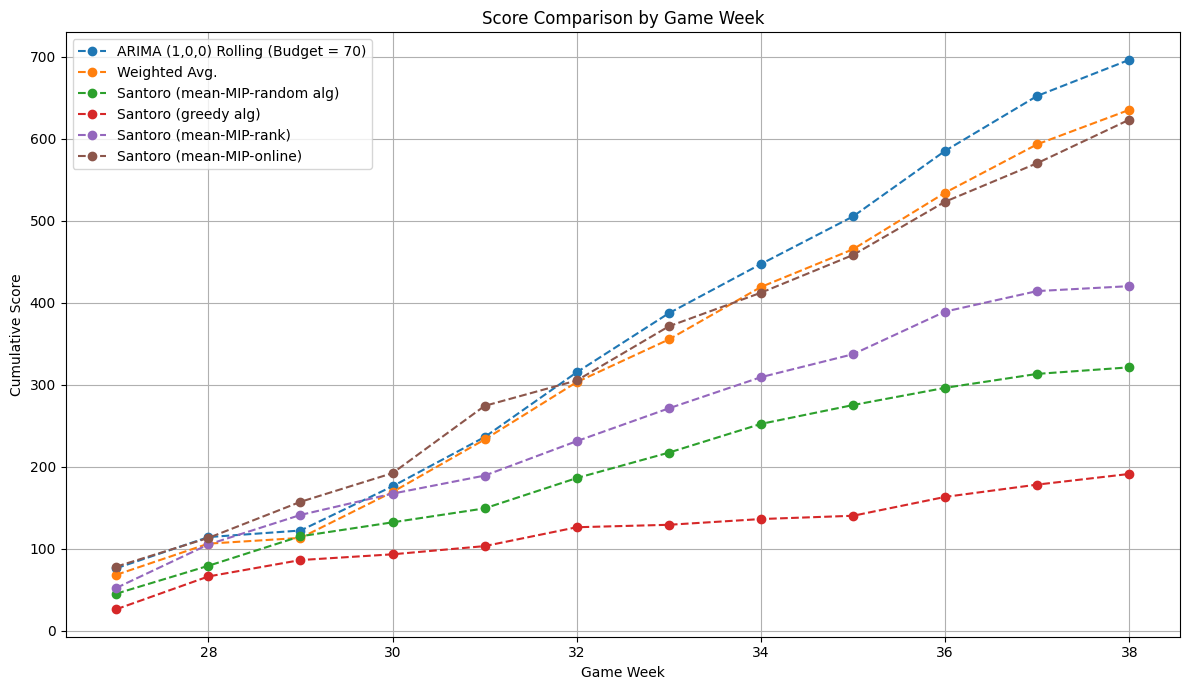

In [ ]:
import matplotlib.pyplot as plt

Sdf = res

cols = [

"ARIMA (1,0,0) Rolling (Budget = 70)","Weighted Avg." , "Santoro (mean-MIP-random alg)",	"Santoro (greedy alg)"	,"Santoro (mean-MIP-rank)"	,"Santoro (mean-MIP-online)"
]


# Compute cumulative sums
cumulative = Sdf[cols].cumsum()

# Define game weeks explicitly
gameweeks = list(range(27, 27 + len(Sdf)))

# Plot with dots instead of continuous lines
plt.figure(figsize=(12, 7))

for col in cumulative.columns:
    plt.plot(gameweeks, cumulative[col], marker="o", linestyle="--", label=col)

plt.xlabel("Game Week")
plt.ylabel("Cumulative Score")
plt.title("Score Comparison by Game Week")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig("img.pdf", format="pdf")
plt.show()


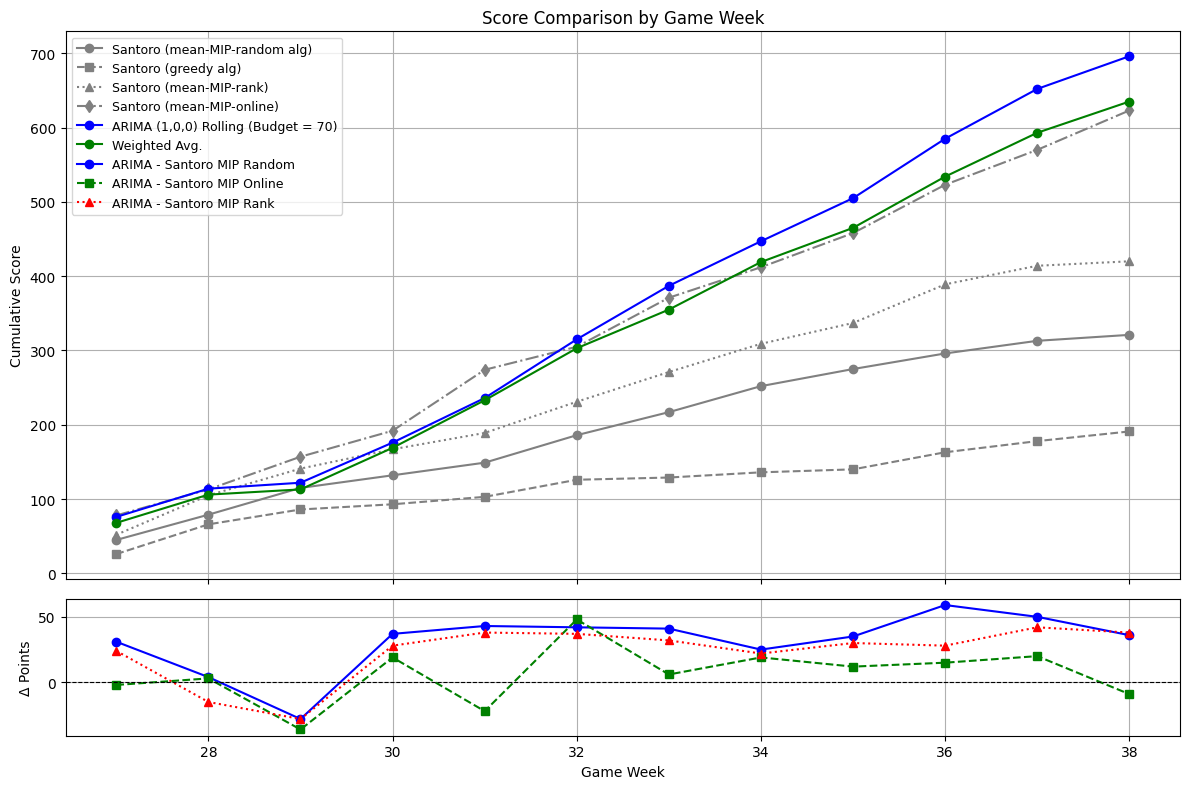

In [ ]:
import matplotlib.pyplot as plt

Sdf = res

cols = [
    "ARIMA (1,0,0) Rolling (Budget = 70)",
    "Weighted Avg.",
    "Santoro (mean-MIP-random alg)",
    "Santoro (greedy alg)",
    "Santoro (mean-MIP-rank)",
    "Santoro (mean-MIP-online)"
]

# Compute cumulative sums
cumulative = Sdf[cols].cumsum()

# Define game weeks explicitly
gameweeks = list(range(27, 27 + len(Sdf)))

# Create figure with two panels (main + slim difference panel)
fig, (ax_main, ax_diff) = plt.subplots(
    2, 1, figsize=(12, 8),
    gridspec_kw={"height_ratios": [4, 1]},
    sharex=True
)

# Define line styles and markers for Santoro benchmarks
benchmark_styles = {
    "Santoro (mean-MIP-random alg)": ("-", "o"),
    "Santoro (greedy alg)": ("--", "s"),
    "Santoro (mean-MIP-rank)": (":", "^"),
    "Santoro (mean-MIP-online)": ("-.", "d")
}

# Plot Santoro benchmarks in gray with different styles
for col, (linestyle, marker) in benchmark_styles.items():
    ax_main.plot(gameweeks, cumulative[col], linestyle=linestyle, marker=marker, color="gray", label=col)

# Overlay ARIMA and Weighted Avg.
line_arima, = ax_main.plot(gameweeks, cumulative["ARIMA (1,0,0) Rolling (Budget = 70)"], marker="o", linestyle="-", color="blue", label="ARIMA (1,0,0) Rolling (Budget = 70)")
line_weighted, = ax_main.plot(gameweeks, cumulative["Weighted Avg."], marker="o", linestyle="-", color="green", label="Weighted Avg.")

ax_main.set_ylabel("Cumulative Score")
ax_main.set_title("Score Comparison by Game Week")
ax_main.grid(True)

# Slim panel: per-GW differences
arima_diff = Sdf["ARIMA (1,0,0) Rolling (Budget = 70)"] - Sdf["Santoro (mean-MIP-random alg)"]
arima_diff2 = Sdf["ARIMA (1,0,0) Rolling (Budget = 70)"] - Sdf["Santoro (mean-MIP-online)"]
arima_diff3 = Sdf["ARIMA (1,0,0) Rolling (Budget = 70)"] - Sdf["Santoro (mean-MIP-rank)"]

line_diff1, = ax_diff.plot(gameweeks, arima_diff, marker="o", linestyle="-", color="blue", label="ARIMA - Santoro MIP Random")
line_diff2, = ax_diff.plot(gameweeks, arima_diff2, marker="s", linestyle="--", color="green", label="ARIMA - Santoro MIP Online")
line_diff3, = ax_diff.plot(gameweeks, arima_diff3, marker="^", linestyle=":", color="red", label="ARIMA - Santoro MIP Rank")

ax_diff.axhline(0, color="black", linewidth=0.8, linestyle="--")
ax_diff.set_xlabel("Game Week")
ax_diff.set_ylabel("Δ Points")
ax_diff.grid(True)

# Merge legends
lines = list(ax_main.get_lines()) + [line_diff1, line_diff2, line_diff3]
labels = [line.get_label() for line in lines]
ax_main.legend(lines, labels, loc="upper left", fontsize=9)

plt.tight_layout()
plt.savefig("img.pdf", format="pdf")
plt.show()


Processing position: GK
Hybrid RMSE for position GK: 0.4249


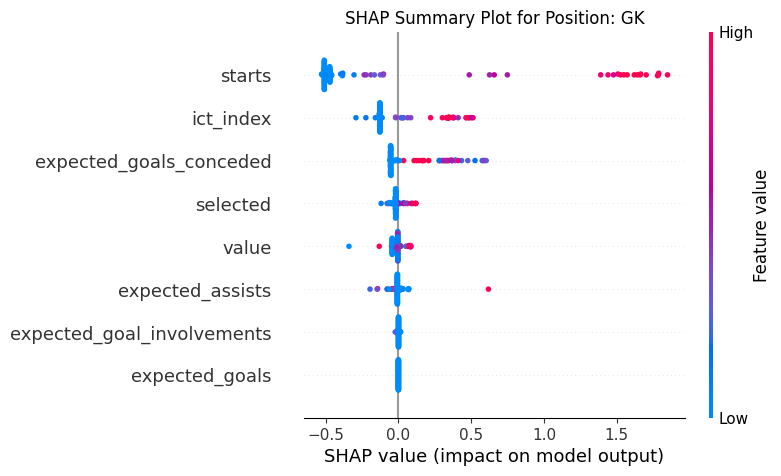

Processing position: DEF
Hybrid RMSE for position DEF: 0.3505


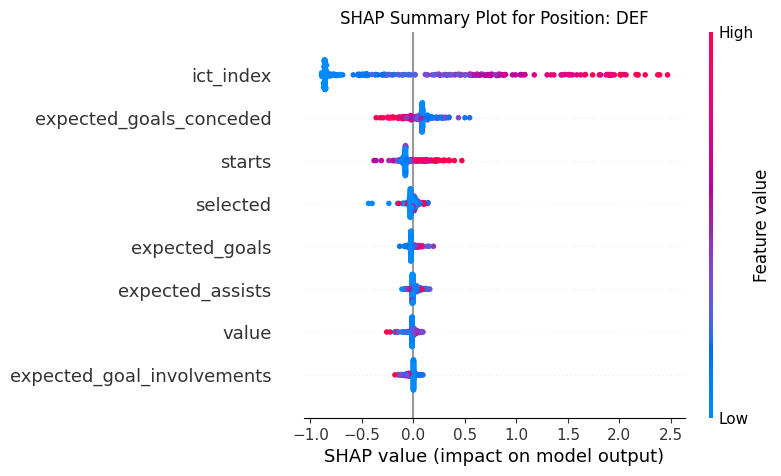

Processing position: MID
Hybrid RMSE for position MID: 0.4708


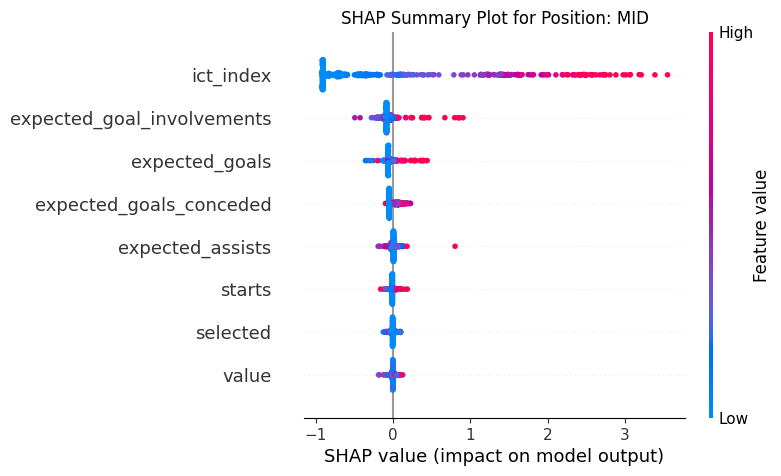

Processing position: FWD
Hybrid RMSE for position FWD: 0.2691


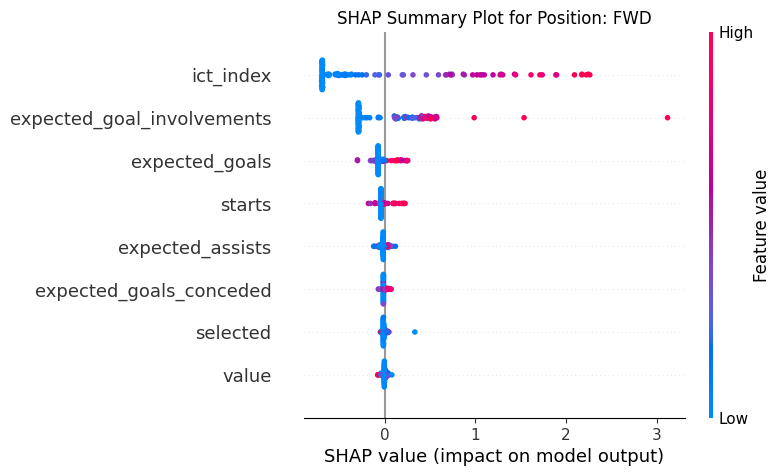

,name,team,position,expected points,uncertainty,value,hybrid_points
0,Femi Seriki,Sheffield Utd,DEF,0.000000,0.000000,3.9,0.007380
1,Jack Hinshelwood,Brighton,MID,1.615385,2.815343,4.5,2.170948
2,Jadon Sancho,Man Utd,MID,0.115385,0.325813,6.7,0.017094
3,Rhys Norrington-Davies,Sheffield Utd,DEF,0.076923,0.392232,3.9,0.119659
4,Vitaly Janelt,Brentford,MID,2.346154,1.198075,5.3,2.296305


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming scores_df is already loaded

# List of positions
positions = ['GK', 'DEF', 'MID', 'FWD']

# Create a new hybrid_points column
scores_df_['hybrid_points'] = 0.0

# Loop through each position
for position in positions:
    print(f"Processing position: {position}")

    # Filter data for the current position
    df_position = scores_df_[scores_df_['position'] == position].copy()

    if df_position.empty:
        print(f"No data for position: {position}. Skipping...")
        continue

    # Select relevant features
    feature_columns = [
        'value',
        'expected_assists',
        'expected_goal_involvements',
        'expected_goals',
        'expected_goals_conceded',
        'ict_index',
        'selected',
        'starts'
    ]

    X = df_position[feature_columns]
    y = df_position['total_points']

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train XGBoost model
    model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    model.fit(X_scaled, y)

    # SHAP explanation
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_scaled)

    # Get top 4 SHAP contributors for each sample
    shap_abs = np.abs(shap_values)
    top4_indices = np.argsort(-shap_abs, axis=1)[:, :4]  # Indices of top 4 features for each sample

    # Now, sum the actual feature values (not SHAP values) for the top 4 features
    X_array = X.to_numpy()
    top4_feature_sums = np.array([
        X_array[i, top4_indices[i]].sum() for i in range(X_array.shape[0])
    ])

    # Normalize top4_feature_sums for fair combination
    top4_feature_sums_norm = (top4_feature_sums - top4_feature_sums.min()) / (top4_feature_sums.max() - top4_feature_sums.min())

    # Combine total_points and top4 sum
    hybrid_points = y + top4_feature_sums_norm * y.max()  # Scale normalized sum to same magnitude

    # Map back to the main dataframe
    scores_df.loc[df_position.index, 'hybrid_points'] = hybrid_points

    # Optional: Evaluate model performance (still based on original split)
    X_train, X_test, y_train, y_test = train_test_split(X, hybrid_points, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'Hybrid RMSE for position {position}: {rmse:.4f}')

    # Plot SHAP summary plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X, feature_names=feature_columns, show=False)
    plt.title(f'SHAP Summary Plot for Position: {position}')
    plt.savefig(f"{position}.pdf", format="pdf")
    plt.show()

# Final check
scores_df.head()
